In [8]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn
import os
import setuptools
# import keras

In [9]:
#getting the stock data to predict the stocks

start = '2014-01-01'
end = '2024-05-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
#open-morning price
#high-maximum price on that particular day
#low-minimum price on that particular day
#Close-Stock market before closing
#Volume-No.of shares changed from sellers to buyers

data.reset_index(inplace = True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...,...
2615,2024-05-23,178.779999,179.910004,174.539993,175.059998,175.059998,14928400
2616,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
2617,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
2618,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800


In [12]:
# Moving Average Chart

ma_100_days = data.Close.rolling(100).mean()

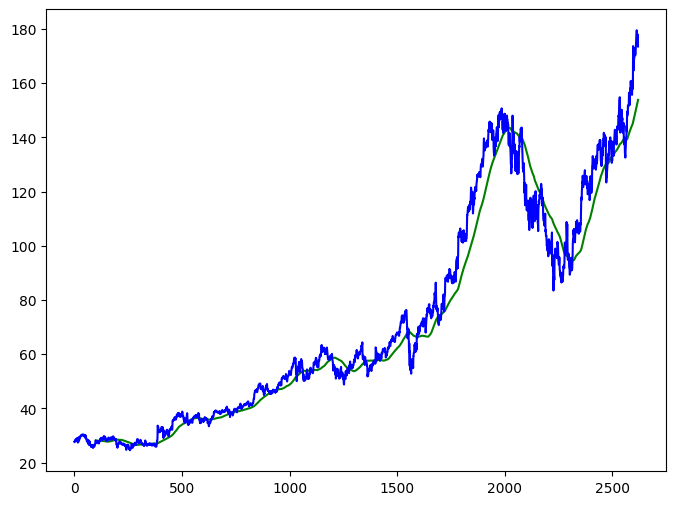

In [14]:
#Drawing a graph

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'g') #color=green
plt.plot(data.Close, 'b')  #color=blue
plt.show()

In [16]:
ma_200_days = data.Close.rolling(200).mean()

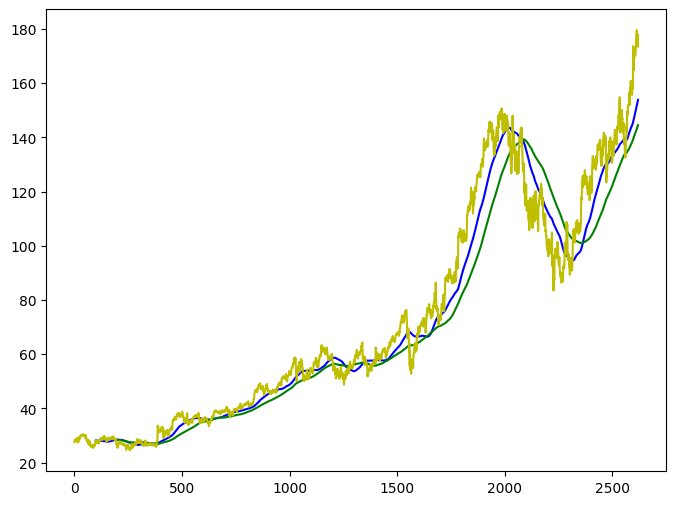

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'b')
plt.plot(ma_200_days, 'g')
plt.plot(data.Close, 'y')
plt.show()

In [18]:
data.dropna(inplace = True)

In [19]:
#checking the data

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =  pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
#Draw the shape, data and scope

data_train.shape[0]

2096

In [21]:
data_test.shape[0]

524

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
#Scaling or Slicing the actual data set

# from sklearn.preprocessing import StandardScaler
data_train_scale = scaler.fit_transform(data_train)

In [25]:
#10, 11, 12, 15, 16, 17, 18, 19, 20, 17, 18, 19
# Calculating the data

x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [26]:
x, y = np.array(x), np.array(y)

In [30]:
# Importing the Libraries

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
# Creating the modules:
# Units = 50: Creating a neurons for each and evey model/Layer and Creation of 4 LSTM layers for the sequential.
# Relu is a kind of neural network parameter which is passed to calculate the RNN Neural networks.
# Dropout ensures that the model is not too overfitted.

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))
          
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [34]:
#Compliling the models

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - loss: 0.0653
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - loss: 0.0063
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - loss: 0.0050
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - loss: 0.0054
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - loss: 0.0050
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - loss: 0.0046
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - loss: 0.0047
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - loss: 0.0044
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - loss: 0.0047
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - loss: 0.0043
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - loss: 0.0043
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - loss: 0.0032
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - loss: 0.0039
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - loss: 0.0030
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [36]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [40]:
data_test_scale = scaler.fit_transform(data_test)

In [42]:
#Array Slicing

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [43]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step


In [49]:
scale = 1 / scaler.scale_

In [50]:
y_predict = y_predict * scale

In [51]:
y = y * scale

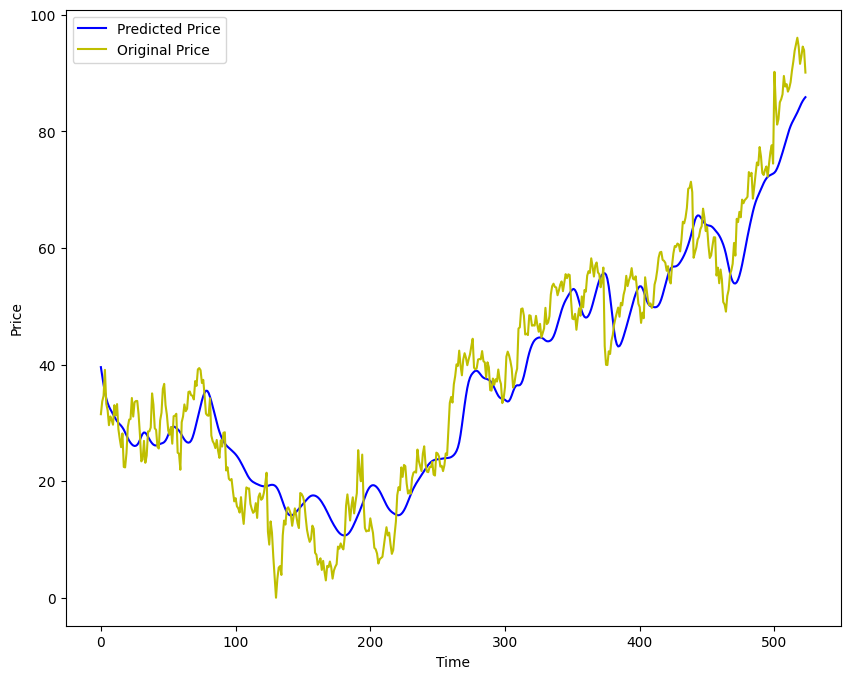

In [52]:
# Drawing a graph

plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'b', label = 'Predicted Price')
plt.plot(y, 'y', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
model.save('Stock Predictions Model.keras')